# Installing Hidden Markov

In [35]:
!pip install hidden_markov

# Importing Required Packages

In [36]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from hidden_markov import hmm
%matplotlib inline

# Hidden State and Initial Probability

In [37]:
hidden_states = ['happy', 'sad']
initial_prob = np.matrix( '0.5 0.5')
# state_space = pd.Series(pi, index=hidden_states, name='states')
pd.DataFrame(initial_prob,  columns= hidden_states )

,happy,sad
0,0.5,0.5


# Transition Probability

In [38]:
trans_pro =np.matrix( '0.7 0.3 ; 0.4 0.6')
a_df = pd.DataFrame(trans_pro, columns=hidden_states, index=hidden_states)

In [39]:
a_df

,happy,sad
happy,0.7,0.3
sad,0.4,0.6


# Observable States

In [40]:
observable_states = ['rainy', 'cloudy', 'sunny']
emission_prob =np.matrix( '0.1 0.5 0.4 ; 0.8 0.1 0.1')
b_df = pd.DataFrame(emission_prob,columns=observable_states, index=hidden_states)

In [41]:
b_df

,rainy,cloudy,sunny
happy,0.1,0.5,0.4
sad,0.8,0.1,0.1


# Creating a Function That Maps Transition Probability Dataframe to Markov Edges and Weights

In [42]:
def hmm_edges(df):
    edges = {}
    for col in df.columns:
        for idx in df.index:
            edges[(idx,col)] = df.loc[idx,col]
    return edges

In [43]:
hide_edges_wts = hmm_edges(a_df)
print(hide_edges_wts)

emit_edges_wts = hmm_edges(b_df)
print(emit_edges_wts)

{('happy', 'happy'): 0.7, ('sad', 'happy'): 0.4, ('happy', 'sad'): 0.3, ('sad', 'sad'): 0.6}
{('happy', 'rainy'): 0.1, ('sad', 'rainy'): 0.8, ('happy', 'cloudy'): 0.5, ('sad', 'cloudy'): 0.1, ('happy', 'sunny'): 0.4, ('sad', 'sunny'): 0.1}


# Creating Graph Object

In [44]:
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(hidden_states)
G.add_nodes_from(observable_states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent hidden probabilities
for k, v in hide_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

# edges represent emission probabilities
for k, v in emit_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
    
nx.drawing.nx_pydot.write_dot(G, 'happy_sad_hidden_markov.dot')

Nodes:
['happy', 'sad', 'rainy', 'cloudy', 'sunny']



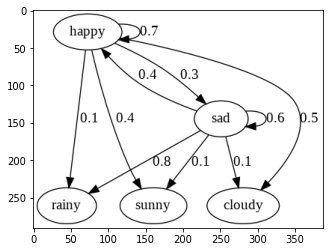

In [45]:
!dot -T png happy_sad_hidden_markov.dot > happy_sad_hidden_markov.png

img = mpimg.imread('/content/happy_sad_hidden_markov.png')
imgplot = plt.imshow(img)
plt.show()

For example, you would expect that if your dog is eating there is a high probability that it is healthy (60%) and a very low probability that the dog is sick (10%).

Now, what if you needed to discern the health of your dog over time given a sequence of observations?  

In [46]:
test = hmm(hidden_states,observable_states,initial_prob,trans_pro,emission_prob)

In [47]:
observations = ('sunny','cloudy','rainy')

In [48]:
print(test.viterbi(observations))

['happy', 'happy', 'sad']
